In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import exposure
from nilearn import plotting
%matplotlib inline
import csv
import torch

In [2]:
train_info_path = "../data/ribfrac-challenge/training/ribfrac-train-info-all.csv"

label_map = {}
with open(train_info_path, newline="") as f:
    reader = csv.DictReader(f, delimiter=",")
    for row in reader:
        public_id = row["public_id"]
        label_id = int(row["label_id"])
        code = int(row["label_code"])

        if public_id not in label_map:
            label_map[public_id] = {}

        label_map[public_id][label_id] = code

In [3]:
public_id = 'RibFrac1'

In [4]:
labels = nib.load(f'../data/ribfrac-challenge/mini/labels/{public_id}-label.nii.gz').get_fdata()
labels = torch.tensor(labels)
labels = labels.apply_(label_map[public_id].get).numpy()

In [5]:
img = nib.load(f'../data/ribfrac-challenge/mini/images/{public_id}-image.nii.gz').get_fdata()

In [6]:
prediction = np.load(f'../inference-results-mini/{public_id}-image-prediction.npy')

In [7]:
probs = np.load(f'../inference-results-mini/{public_id}-image-bin-probs.npy')

In [8]:
print("label image shape:", prediction.shape)

label image shape: (512, 512, 333)


In [9]:
print(labels.min())
print(labels.max())


0.0
2.0


In [10]:
img.shape

(512, 512, 333)

(array([   0.,    0.,    0.,    0.,    0., 8261.,    0.,    0.,    0.,
           0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

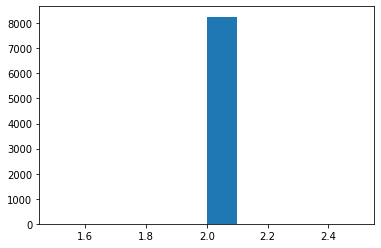

In [11]:
plt.hist(labels[labels != 0].flatten())

(array([8.7283258e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0694000e+04]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

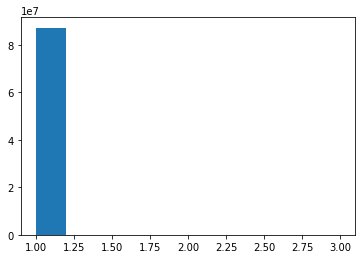

In [12]:
plt.hist(prediction.flatten())

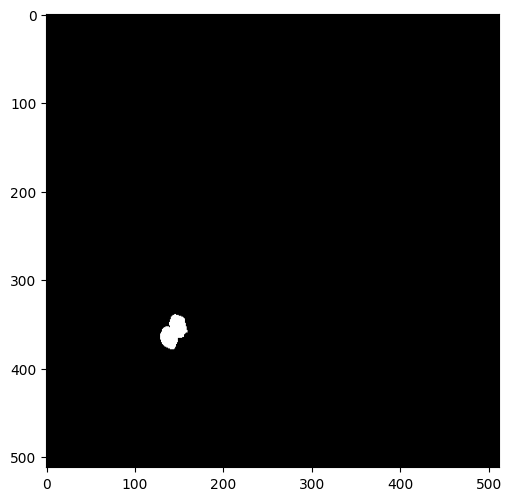

In [13]:
plt.figure(figsize = (6,6), dpi=100) 
labels_plt = np.max(labels, axis=-1)
plt.imshow(labels_plt, cmap=plt.cm.gray) 


(512, 512, 333)
(512, 512)


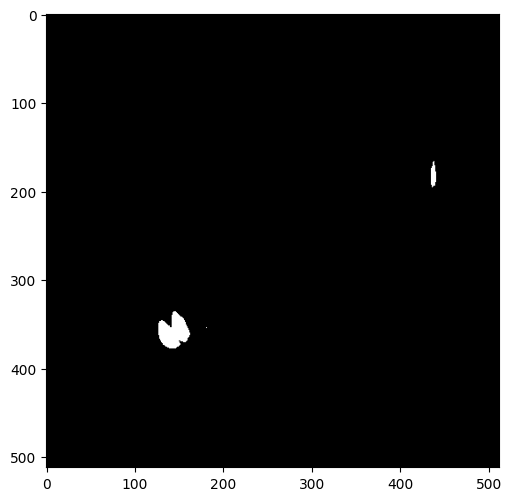

In [14]:
plt.figure(figsize = (6,6), dpi=100) 
print(prediction.shape)
combined_slices = np.max(prediction > 1, axis=-1)
print(combined_slices.shape)
plt.imshow(combined_slices, cmap=plt.cm.gray) 

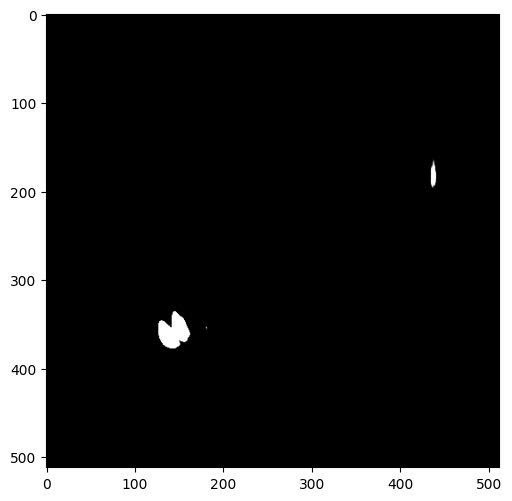

In [15]:
# plot probs
plt.figure(figsize = (6,6), dpi=100) 
combined_slices = np.max(probs, axis=-1)
plt.imshow(combined_slices, cmap=plt.cm.gray) 